**Импортируем библиотеки и загружаем датасет**

In [1]:
import pandas as pd
import numpy as np
rent = pd.read_csv('Toronto_apartment_rentals_2018.csv')
rent.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00"


**Узнаем количество строк и колонок в датасете через оператор shape**

In [2]:
rent.shape

(1124, 7)

**Узнаем информацию о датасете**

In [3]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bedroom   1124 non-null   int64  
 1   Bathroom  1124 non-null   float64
 2   Den       1124 non-null   int64  
 3   Address   1124 non-null   object 
 4   Lat       1124 non-null   float64
 5   Long      1124 non-null   float64
 6   Price     1124 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 61.6+ KB


В датасете нет пропущенных данных в ячейках, это хорошо.
**Также видим, что стоимость аренды имеет строчный формат.** Дальше мы будем это исправлять, а пока кратко пробежимся непосредственно по квартирам.

**Исследуем количество лотов для аренды с более чем 2-я спальнями и 2-я ванными комнатами в датасете, чтобы можно было снимать квартиру пополам с другом**

In [4]:
rent[(rent['Bedroom'] >=2) & (rent['Bathroom'] >=2)]

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00"
18,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00"
19,2,2.0,0,"11 Brunel Ct, Toronto, ON M5V 3Y3, Canada",43.639406,-79.393232,"$3,150.00"
20,2,2.0,0,"12 Yonge St, Toronto, ON M5E 1Z9, Canada",43.643105,-79.375906,"$3,200.00"
...,...,...,...,...,...,...,...
1103,2,2.0,0,", M9B 1B1, Etobicoke, ON",43.637256,-79.538215,"$2,500.00"
1109,2,2.0,0,"20 Bruyeres Mews, Toronto, ON M5V 0G8, Canada",43.637524,-79.400877,"$3,100.00"
1115,2,2.0,0,"55 Regent Park Blvd, M5A2B7, Toronto, ON",43.659421,-79.361025,"$2,600.00"
1117,2,2.0,0,"435 Richmond St West, M5V 0N3, Toronto, ON",43.647624,-79.396861,"$3,000.00"


**Исследуем количество лотов для аренды с минимум 2-я спальнями или кладовкой в датасете, чтобы было место для хранения велосипеда**

In [5]:
rent[(rent['Bedroom'] >=2) | (rent['Den'] >=1)]

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00"
6,2,1.0,0,"700 Ross Street, Burlington, ON, L7S 1S2",43.328986,-79.808618,"$1,685.00"
9,1,1.0,1,"70 Queens Wharf Rd 33rd Floor, Toronto, ON M5V...",43.640068,-79.399960,"$2,400.00"
...,...,...,...,...,...,...,...
1115,2,2.0,0,"55 Regent Park Blvd, M5A2B7, Toronto, ON",43.659421,-79.361025,"$2,600.00"
1117,2,2.0,0,"435 Richmond St West, M5V 0N3, Toronto, ON",43.647624,-79.396861,"$3,000.00"
1118,3,2.0,0,"Maple Crossing Blvd, Burlington, ON L7S 2J3, C...",43.322843,-79.807718,"$2,400.00"
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,"$3,000.00"


**Отсортируем варианты по количеству спален по возрастанию**

In [6]:
rent.sort_values(by=['Bedroom'], ascending=False)

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
1043,3,3.0,0,"397 Front St W, Toronto, ON M5V 3S1, Canada",43.642569,-79.393460,"$4,900.00"
829,3,3.0,0,"1353 Davenport Rd, Toronto, ON M6H 2H5, Canada",43.673017,-79.439933,"$2,500.00"
467,3,2.0,0,"20 Graydon Hall Drive, Toronto, ON, M3A 2Z9",43.763487,-79.345984,"$2,000.00"
865,3,2.0,0,"l6x1k5, Canada",43.684852,-79.775558,"$1,900.00"
291,3,1.5,0,"19 Sudbury St, Toronto, ON M6J 3W6, Canada",43.641109,-79.419448,"$3,450.00"
...,...,...,...,...,...,...,...
472,1,1.0,1,"85 Hamilton St, Toronto, ON M4M 2C7, Canada",43.661063,-79.351541,"$2,500.00"
474,1,1.0,1,"l5m6j5, Canada",43.563449,-79.743317,"$2,499.00"
475,1,1.0,0,"85 Hamilton St, Toronto, ON M4M 2C7, Canada",43.661063,-79.351541,"$2,500.00"
477,1,2.0,1,"455 Front St E, Toronto, ON M5A 0G2, Canada",43.652331,-79.356014,"$2,300.00"


**Посчитаем объем лотов по количеству спален**

In [7]:
rent['Bedroom'].value_counts()

1    749
2    334
3     41
Name: Bedroom, dtype: int64

В итоге: в нашем датасете есть гораздо больше опций для съема однокомнатных квартир в Торонто, чуть больше опций для съема двушек с кладовыми комнатами, еще меньше двушек с двумя ванными и совсем мало опций для съема трехкомнатных квартир. Теперь нам нужно определить, сколько каждый сожитель будет платить за арендуемую комнату и вычислить наиболее выгодную комбинацию для заселения.
    **Остается проблема с ценами на квартиры, которые имеют формат строк, а не чисел, как нам нужно для дальнейших вычислений**

In [8]:
rent['Price'].apply(type).value_counts()

<class 'str'>    1124
Name: Price, dtype: int64

**Необходимо преобразовать их в формат чисел, очистить от лишних знаков $ и ,**

In [9]:
rent['Price'] = rent['Price'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
rent

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0
...,...,...,...,...,...,...,...
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,3000.0
1120,1,1.0,0,", oakville L6M3V5 ON, Canada",43.445426,-79.736833,1200.0
1121,1,1.0,0,"Upper Beaches, Toronto, ON, Canada, M4C 1B4",43.683386,-79.309409,1800.0
1122,2,1.0,0,", Toronto M5B 2L7 ON, Canada",43.653636,-79.380873,2200.0


Проверим тип данных в столбце Price теперь

In [10]:
rent['Price'].apply(type).value_counts()

<class 'float'>    1124
Name: Price, dtype: int64

Проверим, нет ли странных значений цены в датасете

In [11]:
rent['Price'].sort_values()

816         65.0
973         99.0
794         99.0
761        150.0
1110       300.0
          ...   
952       9750.0
917      36900.0
129     535000.0
238     535000.0
371     535000.0
Name: Price, Length: 1124, dtype: float64

Странные значения есть. Наши данные в столбце Price имеют тип данных float, переведем их в int

In [12]:
rent['Price'] = pd.to_numeric(rent['Price'])
rent['Price']

0       2450.0
1       2150.0
2       1950.0
3       2900.0
4       1800.0
         ...  
1119    3000.0
1120    1200.0
1121    1800.0
1122    2200.0
1123    2150.0
Name: Price, Length: 1124, dtype: float64

In [13]:
rent['Price'].astype(int)

0       2450
1       2150
2       1950
3       2900
4       1800
        ... 
1119    3000
1120    1200
1121    1800
1122    2200
1123    2150
Name: Price, Length: 1124, dtype: int64

**Удалим строки, для которых цена подозрительно низкая. Предположим, всё, что ниже $500**. _Примечание: данный этап был сделан до прохождения блока Выбросы в курсе, поэтому аномальные значения определены субъективно. В данном случае мы можем себе это позволить, поскольку решаем задачу отбора подходящего под наши условия жилища, а не расчета статистик. Примем за данность, что в более дешевом жилье нам жить не хочется, и пределы допустимой цены у нас тоже определены свои, субъективные, на основе опыта и контент-анализа агрегаторов недвижимости._

In [14]:
rent = rent.loc[rent['Price'] >= 500]
rent

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0
...,...,...,...,...,...,...,...
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,3000.0
1120,1,1.0,0,", oakville L6M3V5 ON, Canada",43.445426,-79.736833,1200.0
1121,1,1.0,0,"Upper Beaches, Toronto, ON, Canada, M4C 1B4",43.683386,-79.309409,1800.0
1122,2,1.0,0,", Toronto M5B 2L7 ON, Canada",43.653636,-79.380873,2200.0


Проверим, действительно ли такие значения удалились на примере строки 816, в которой была самая низкая цена. Найдем эту строку

In [15]:
rent.iloc[805:820]

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
807,2,2.0,0,"16 Brookers Ln, Etobicoke, ON M8V 0A5, Canada",43.626966,-79.478488,3000.0
808,1,1.0,1,"M1N, Canada",43.692657,-79.264848,1200.0
809,2,2.0,0,"20 Bruyeres Mews, Toronto, ON M5V 0G8, Canada",43.637524,-79.400877,3500.0
810,2,2.0,0,"70 Temperance St, M5H4E8, Toronto, ON",43.650560,-79.382072,3000.0
811,1,1.0,0,"Burnhamthorpe Rd W, Mississauga, ON L5B 3R2, C...",43.586055,-79.644240,2000.0
812,1,1.0,0,"2050 Prospect St, Burlington, ON L7R 1Y9, Canada",43.334958,-79.807817,1275.0
813,2,1.0,0,"700 Ross st, L7S 1S2, Burlington, ON",43.328986,-79.808618,1600.0
814,1,1.0,0,"29 Camden St #602, Toronto, ON M5V 3N3, Canada",43.646879,-79.397213,2900.0
815,1,1.0,0,", Toronto M5V0P3 ON, Canada",43.653226,-79.383184,2000.0
817,1,1.0,1,"Burnhamthorpe Rd W, Mississauga, ON L5B 3R2, C...",43.586055,-79.644240,2000.0


Строки действительно нет, потому что мы ее убрали через наше условие. **Но еще у нас были аномально большие значения, их тоже придется убрать. Предположим, всё, что дороже $6000**

In [16]:
rent = rent.loc[rent['Price'] <= 6000]
rent

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0
...,...,...,...,...,...,...,...
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,3000.0
1120,1,1.0,0,", oakville L6M3V5 ON, Canada",43.445426,-79.736833,1200.0
1121,1,1.0,0,"Upper Beaches, Toronto, ON, Canada, M4C 1B4",43.683386,-79.309409,1800.0
1122,2,1.0,0,", Toronto M5B 2L7 ON, Canada",43.653636,-79.380873,2200.0


Проверим, действительно ли такие значения удалились на примере строки 129, в которой была аномально высокая цена. Найдем эту строку

In [17]:
rent.iloc[120:135]

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
120,1,1.0,0,"Water Walk Dr, Markham, ON L3R, Canada",43.856310,-79.328630,1800.0
121,1,1.0,1,"52 Sumach St, Toronto, ON M5A 3J7, Canada",43.655988,-79.358877,3200.0
122,1,1.0,1,"12 York St, Toronto, ON M5J 2Z2, Canada",43.641873,-79.381906,2400.0
123,1,1.0,0,", DOWNTOWN M5V 4A9 ON, Canada",43.640402,-79.397147,2100.0
124,1,1.0,0,"460 Adelaide St E, Toronto, ON, M4V 1K6",43.652757,-79.366511,2480.0
125,1,1.0,1,"1 The Esplanade, Toronto, ON, M5E 0A8",43.645809,-79.375682,3000.0
126,1,1.0,0,"560 King St W, Toronto, ON, M4V 1K6",43.644864,-79.399060,2250.0
127,1,1.0,0,"290 Adelaide Street West, Toronto, ON, M5V 1P6",43.647870,-79.391138,1850.0
128,2,1.0,0,"2386 New Street, Burlington, ON, L7R 1J7",43.336221,-79.786900,1750.0
130,2,1.0,0,"700 Ross Street, Burlington, ON, L7S 1S2",43.328986,-79.808618,1675.0


Похоже, что все аномальные значения цены мы отфильтровали. **Теперь мы можем перейти к нашей главное задаче - понять, что будет выгоднее снять в складчину, то есть одну квартиру с разными комнатами на несколько человек. Для этого введем новую переменную Price per Room, чтобы понять, сколько каждому жильцу придется платить за свою комнату**

In [18]:
rent['Price per Room'] = rent['Price'] / rent['Bedroom']
rent.head()

/var/folders/cr/mhjjb8ps37zbc413mwx137r00000gn/T/ipykernel_18206/1038192061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['Price per Room'] = rent['Price'] / rent['Bedroom']


,Bedroom,Bathroom,Den,Address,Lat,Long,Price,Price per Room
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0,1225.0
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0,2150.0
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0,1950.0
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0,1450.0
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0,1800.0


Сейчас у нас есть варианты от 500  до 6000 долларов за квартиру. Это довольно большой разброс. Нам нужно понять, на какой бюджет мы должны ориентироваться, чтобы выбирать варианты для съема с сожителями. Посчитаем медиану, т.к. она менее чувствительна к большому числовому размаху

In [27]:
rent['Price per Room'].median()

1750.0

Отлично, но для нас это очень дорого за одну комнату, нужно выбрать оптимальные варианты, исходя из нашего бюджета. **Допустим, мои сожители готовы снимать квартиру в Торонто со мной и платить не больше $1200 с каждого за свою комнату. Нам нужно минимум две комнаты, если снимать будем вдвоем, но можем и дополнительных соседей пригласить на сожительство. Посмотрим, что нам лучше всего подойдет.**

In [29]:
rent[(rent['Bedroom'] >=2) & (rent['Price per Room'] <=1200)]

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,Price per Room
6,2,1.0,0,"700 Ross Street, Burlington, ON, L7S 1S2",43.328986,-79.808618,1685.0,842.5
11,2,1.0,0,"545 - 555 Sherbourne Street, Toronto, ON, M4X...",43.668468,-79.374834,2000.0,1000.0
29,2,1.0,0,"33 Gamble Ave, East York, ON M4K 2H5, Canada",43.689362,-79.352848,2245.0,1122.5
40,2,1.5,0,"1375 Stephenson Dr Unit 24, Burlington, ON L7S...",43.331674,-79.815354,2000.0,1000.0
45,2,1.0,0,"200 Dufferin Street, Toronto, ON, M6K 1Z4",43.637153,-79.427092,2230.0,1115.0
...,...,...,...,...,...,...,...,...
1090,2,2.0,0,", toronto m1m4j3 ON, Canada",43.653226,-79.383184,1750.0,875.0
1111,2,1.0,0,"1384 Bathurst St, Toronto, ON M5R 3J1, Canada",43.680546,-79.417573,2100.0,1050.0
1118,3,2.0,0,"Maple Crossing Blvd, Burlington, ON L7S 2J3, C...",43.322843,-79.807718,2400.0,800.0
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,3000.0,1000.0


Мы видим 180 подходящих нам вариантов. Остальные нам не подходят по бюджету и мы готовы их не рассматривать дальше.

In [30]:
rent = rent.loc[rent['Price per Room'] <= 1200]
rent

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,Price per Room
6,2,1.0,0,"700 Ross Street, Burlington, ON, L7S 1S2",43.328986,-79.808618,1685.0,842.5
11,2,1.0,0,"545 - 555 Sherbourne Street, Toronto, ON, M4X...",43.668468,-79.374834,2000.0,1000.0
29,2,1.0,0,"33 Gamble Ave, East York, ON M4K 2H5, Canada",43.689362,-79.352848,2245.0,1122.5
40,2,1.5,0,"1375 Stephenson Dr Unit 24, Burlington, ON L7S...",43.331674,-79.815354,2000.0,1000.0
45,2,1.0,0,"200 Dufferin Street, Toronto, ON, M6K 1Z4",43.637153,-79.427092,2230.0,1115.0
...,...,...,...,...,...,...,...,...
1111,2,1.0,0,"1384 Bathurst St, Toronto, ON M5R 3J1, Canada",43.680546,-79.417573,2100.0,1050.0
1118,3,2.0,0,"Maple Crossing Blvd, Burlington, ON L7S 2J3, C...",43.322843,-79.807718,2400.0,800.0
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,3000.0,1000.0
1120,1,1.0,0,", oakville L6M3V5 ON, Canada",43.445426,-79.736833,1200.0,1200.0


In [31]:
rent = rent.loc[rent['Bedroom'] >=2]
rent

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,Price per Room
6,2,1.0,0,"700 Ross Street, Burlington, ON, L7S 1S2",43.328986,-79.808618,1685.0,842.5
11,2,1.0,0,"545 - 555 Sherbourne Street, Toronto, ON, M4X...",43.668468,-79.374834,2000.0,1000.0
29,2,1.0,0,"33 Gamble Ave, East York, ON M4K 2H5, Canada",43.689362,-79.352848,2245.0,1122.5
40,2,1.5,0,"1375 Stephenson Dr Unit 24, Burlington, ON L7S...",43.331674,-79.815354,2000.0,1000.0
45,2,1.0,0,"200 Dufferin Street, Toronto, ON, M6K 1Z4",43.637153,-79.427092,2230.0,1115.0
...,...,...,...,...,...,...,...,...
1090,2,2.0,0,", toronto m1m4j3 ON, Canada",43.653226,-79.383184,1750.0,875.0
1111,2,1.0,0,"1384 Bathurst St, Toronto, ON M5R 3J1, Canada",43.680546,-79.417573,2100.0,1050.0
1118,3,2.0,0,"Maple Crossing Blvd, Burlington, ON L7S 2J3, C...",43.322843,-79.807718,2400.0,800.0
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,3000.0,1000.0


In [32]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1122
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedroom         180 non-null    int64  
 1   Bathroom        180 non-null    float64
 2   Den             180 non-null    int64  
 3   Address         180 non-null    object 
 4   Lat             180 non-null    float64
 5   Long            180 non-null    float64
 6   Price           180 non-null    float64
 7   Price per Room  180 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 12.7+ KB


**Итого, дальше мы будем работать со 180 вариантами квартир, которые подходят нам по бюджету и по количеству комнат (более двух)**

**Введем новые переменные - Extra Space для квартир с кладовкой и Extra Bathroom для квартир с дополнительной ванной.**

In [46]:
rent['Extra Space'] = rent['Den'].apply(lambda x: 1 if x >=1 else 0)
rent

/var/folders/cr/mhjjb8ps37zbc413mwx137r00000gn/T/ipykernel_18206/3568255569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['Extra Space'] = rent['Den'].apply(lambda x: 1 if x >=1 else 0)


,Bedroom,Bathroom,Den,Address,Lat,Long,Price,Price per Room,Extra Space,Extra Bathroom
6,2,1.0,0,"700 Ross Street, Burlington, ON, L7S 1S2",43.328986,-79.808618,1685.0,842.5,0,0
11,2,1.0,0,"545 - 555 Sherbourne Street, Toronto, ON, M4X...",43.668468,-79.374834,2000.0,1000.0,0,0
29,2,1.0,0,"33 Gamble Ave, East York, ON M4K 2H5, Canada",43.689362,-79.352848,2245.0,1122.5,0,0
40,2,1.5,0,"1375 Stephenson Dr Unit 24, Burlington, ON L7S...",43.331674,-79.815354,2000.0,1000.0,0,0
45,2,1.0,0,"200 Dufferin Street, Toronto, ON, M6K 1Z4",43.637153,-79.427092,2230.0,1115.0,0,0
...,...,...,...,...,...,...,...,...,...,...
1090,2,2.0,0,", toronto m1m4j3 ON, Canada",43.653226,-79.383184,1750.0,875.0,0,1
1111,2,1.0,0,"1384 Bathurst St, Toronto, ON M5R 3J1, Canada",43.680546,-79.417573,2100.0,1050.0,0,0
1118,3,2.0,0,"Maple Crossing Blvd, Burlington, ON L7S 2J3, C...",43.322843,-79.807718,2400.0,800.0,0,1
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,3000.0,1000.0,0,0


In [48]:
rent['Extra Space'].value_counts()

0    180
Name: Extra Space, dtype: int64

Кажется у нас нет квартир с кладовкой по отобранным нами условиям (минимум 2 комнаты и до $1200 за комнату). ~~Возможно проблема в том, что у столбца Den класс данных 'pandas.core.series.Series', но я пока не могу найти рабочий метод, как его изменить, поэтому пока решим, что кладовка нам не нужна .~~ Посмотрим варианты с дополнительной ванной.

In [42]:
rent['Extra Bathroom'] = rent['Bathroom'].apply(lambda x: 1 if x >=2 else 0)
rent

/var/folders/cr/mhjjb8ps37zbc413mwx137r00000gn/T/ipykernel_18206/1281675124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['Extra Bathroom'] = rent['Bathroom'].apply(lambda x: 1 if x >=2 else 0)


,Bedroom,Bathroom,Den,Address,Lat,Long,Price,Price per Room,Extra Space,Extra Bathroom
6,2,1.0,0,"700 Ross Street, Burlington, ON, L7S 1S2",43.328986,-79.808618,1685.0,842.5,0,0
11,2,1.0,0,"545 - 555 Sherbourne Street, Toronto, ON, M4X...",43.668468,-79.374834,2000.0,1000.0,0,0
29,2,1.0,0,"33 Gamble Ave, East York, ON M4K 2H5, Canada",43.689362,-79.352848,2245.0,1122.5,0,0
40,2,1.5,0,"1375 Stephenson Dr Unit 24, Burlington, ON L7S...",43.331674,-79.815354,2000.0,1000.0,0,0
45,2,1.0,0,"200 Dufferin Street, Toronto, ON, M6K 1Z4",43.637153,-79.427092,2230.0,1115.0,0,0
...,...,...,...,...,...,...,...,...,...,...
1090,2,2.0,0,", toronto m1m4j3 ON, Canada",43.653226,-79.383184,1750.0,875.0,0,1
1111,2,1.0,0,"1384 Bathurst St, Toronto, ON M5R 3J1, Canada",43.680546,-79.417573,2100.0,1050.0,0,0
1118,3,2.0,0,"Maple Crossing Blvd, Burlington, ON L7S 2J3, C...",43.322843,-79.807718,2400.0,800.0,0,1
1119,3,1.0,0,", L7S 1R7, Burlington, ON",43.325233,-79.802182,3000.0,1000.0,0,0


In [53]:
rent['Extra Bathroom'].value_counts()

0    116
1     64
Name: Extra Bathroom, dtype: int64

Ура, в нашем отобранном списке есть квартиры с минимум двумя комнатами и двумя ванными.

<AxesSubplot:>

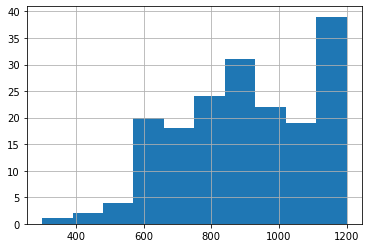

In [49]:
rent['Price per Room'].hist()

<AxesSubplot:>

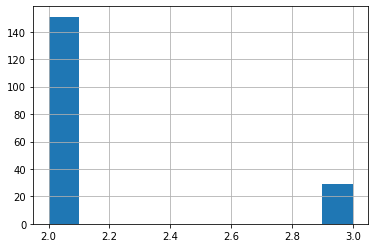

In [50]:
rent['Bedroom'].hist()

<AxesSubplot:>

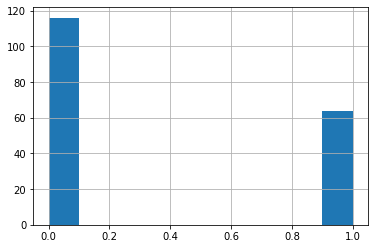

In [52]:
rent['Extra Bathroom'].hist()

**Считаем размах стоимости аренды одной комнаты**

In [55]:
rent['Price per Room'].max() - rent['Price per Room'].min()

900.0

In [56]:
rent['Price per Room'].describe()

count     180.000000
mean      902.153704
std       205.595214
min       300.000000
25%       746.875000
50%       899.500000
75%      1092.000000
max      1200.000000
Name: Price per Room, dtype: float64

**Считаем интерквартильный размах**

In [57]:
np.percentile(rent['Price per Room'], 75) - np.percentile(rent['Price per Room'], 25)

345.125

**Находим дисперсию:** сначала считаем среднее значение стоимости аренды одной комнаты в квартире, потом отклонение, потом возводим отклонения в квадрат, потом дисперсию **для выборки**, потом среднеквадратичное отклонение. Сначала собственными функциями, потом нативными методами

In [59]:
ppr_mean = rent['Price per Room'].mean()
deviations = rent['Price per Room'] - ppr_mean
sq_deviations = deviations ** 2
variance_samp = sq_deviations.sum() / len(rent['Price per Room']) - 1
std_samp = np.sqrt(variance_samp)
print(variance_samp, std_samp)

42033.5621776406 205.0208822965129


In [60]:
print(rent['Price per Room'].var())
print(rent['Price per Room'].std())

42269.39213394025
205.595214277814


**Агрегируем данные по средней стоимости за аренду комнаты в квартире и по среднеквадратичному отклонению от средней стоимости по количеству комнат в квартире**

In [61]:
rent.groupby('Bedroom')['Price per Room'].agg(['mean', 'std'])

,mean,std
Bedroom,,
2,921.980132,194.100368
3,798.919540,235.019801


**Cчитаем размах стоимости аренды одной комнаты собственной функцией и собираем пивотальную таблицу по количеству комнат в отобранных квартирах, дисперсию и среднеквадратичное отклонение по стоимости аренды одной комнаты** 

In [64]:
def range_values(x):
    return x.max() - x.min()
rent.pivot_table(index='Bedroom',
                  values=['Price per Room'],
                  aggfunc=['var', 'std', range_values])

,var,std,range_values
,Price per Room,Price per Room,Price per Room
Bedroom,,,
2,37674.952936,194.100368,900.000000
3,55234.306787,235.019801,766.666667


**Теперь посмотрим, есть ли корреляция между стоимостью аренды комнаты в квартире с наличием более чем двух ванных, чтобы понять, влияет ли это на стоимость аренды и стоит ли рассматривать вариант с двумя ванными при наших бюджетах.** Посчитаем среднюю стоимость аренды комнаты в зависимости от общего количества комнат в квартире и среднее количество ванных, предлагаемое для квартир с разным количеством комнат.

In [73]:
room_average_price = rent.groupby(rent['Bedroom'])['Price per Room'].mean()
room_average_bathroom = rent.groupby(rent['Bedroom'])['Bathroom'].mean()

In [76]:
pd.concat([room_average_price, room_average_bathroom], axis=1)

,Price per Room,Bathroom
Bedroom,,
2,921.980132,1.364238
3,798.919540,1.637931


In [77]:
room_corr = pd.concat([room_average_price, room_average_bathroom], axis=1)

In [78]:
rent['Price per Room'].corr(rent['Bathroom'])

0.32787821273526846

**Вывод: размер оплаты жилья в пересчете на одну комнату не зависит от количества ванных комнат в квартире**

<AxesSubplot:xlabel='Bathroom', ylabel='Price per Room'>

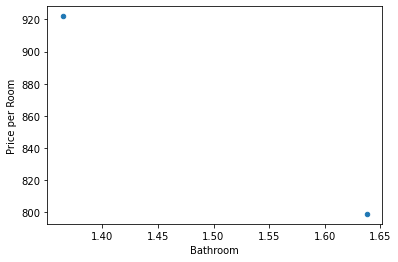

In [79]:
room_corr.plot('Bathroom', 'Price per Room', kind='scatter')

То есть варианты с двумя ванными можно не отбрасывать, т.к. они не влияют на наш бюджет.

**Вывод:** мы рассмотрели список квартир для аренды в Торонто, состоящий из более чем 1000 варивантов. Наша задача состояла в том, чтобы отсортировать оптимальные варианты аренды вскладчину. 
    Мы выяснили, что вариантов квартир с возможностью поселиться с кем-то в разных комнатах сильно меньше, но не отчаялись и пошли фильтровать подходящие варианты. Поговорив с будущими сожителями, мы поняли, что наша предельная цена за одну комнату 1200 долларов и отсортировали список по этому параметру (а также посчитали, что наша предельная стоимость аренды одной комнаты ниже средней по списку, отчего поняли, что наши критерии довольно сложные для отбора). Перед этим мы еще вручную отобрали аномальные значения цены через условия не дешевле 500 и не дороже 6000 долларов за квартиру. Так, мы получили 180 вариантов квартир с 2 и более комнатами. Однако, нас еще интересовало, будет ли влиять количество ванных комнат на стоимость нашего жилья. Оказалось, что нет. Теперь мы можем пользоваться отфильтрованным датасетом и рассматривать варианты в том числе по подходящей нам локации, но это уже совсем другая история.